In [1]:
# Copyright (C) 2022 Intel Corporationworkbench.action.openLargeOutput
#
# SPDX-License-Identifier: MIT

import os
import datumaro as dm
import time

from datumaro.components.searcher import Searcher
from datumaro.components.visualizer import Visualizer

#### device:  cuda


### COCO

In [2]:
start_time = time.time()
# dataset = dm.Dataset.import_from('./tests/assets/coco_dataset/coco', save_hash=True)
dataset = dm.Dataset.import_from("coco_dataset", format='coco_instances', save_hash=True)
# dataset = dm.Dataset.import_from("/media/hdd1/Datasets/imagenet/val", format='imagenet', save_hash=True)
print(f'setting dataset time for {len(dataset)} items: ', time.time()-start_time)

5000it [01:01, 81.41it/s]


setting dataset time for 5000 items:  62.61894917488098


In [3]:
print("Subset candidates: ", dataset.subsets().keys())
subset = list(dataset.subsets().keys())
print("Subset: ", subset)

Subset candidates:  dict_keys(['val2017'])
Subset:  ['val2017']


In [4]:
def get_ids(dataset: dm.Dataset):
    ids = []
    for item in dataset:
            ids += [item.id]
    return ids

In [5]:
ids = get_ids(dataset)

In [6]:
for i, item in enumerate(dataset):
    if i==50:
        query = item
# print(query)

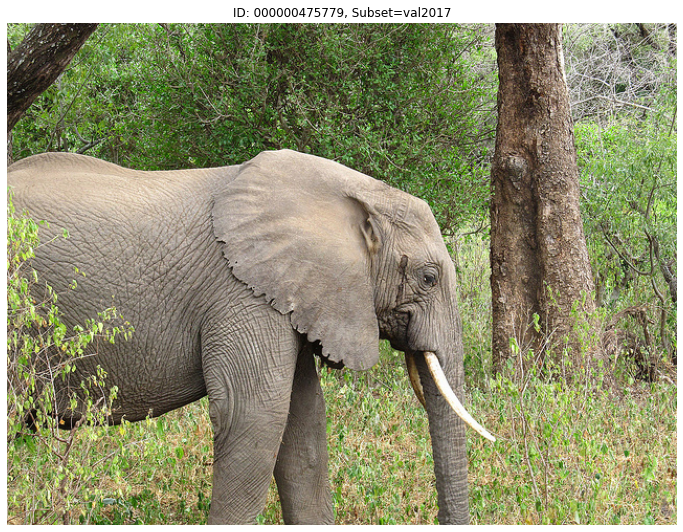

In [7]:
visualizer = Visualizer(dataset, figsize=(12, 12), alpha=0)
fig = visualizer.vis_one_sample(query.id, "val2017")
fig.show()

In [8]:
searcher = Searcher(dataset)

In [9]:
topk_list = searcher.search_topk(query, topk=15)

In [10]:
results = [query] + topk_list[1:]

In [11]:
subset_list = []
id_list =[]
for result in results:
    subset_list.append(result.subset)
    id_list.append(result.id)

In [12]:
id_list

['000000475779',
 '000000024919',
 '000000157213',
 '000000094852',
 '000000420230',
 '000000155571',
 '000000535156',
 '000000167128',
 '000000108864',
 '000000514979',
 '000000028449',
 '000000556765',
 '000000493284',
 '000000263860',
 '000000080274']

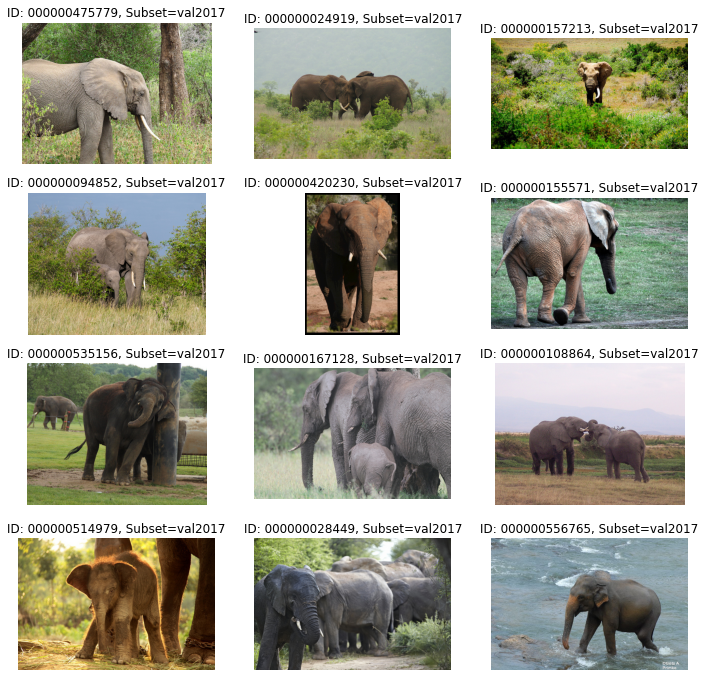

In [13]:
fig = visualizer.vis_gallery(id_list[:12], subset_list[:12], (None, None))
fig.show()

### CIFAR

In [14]:
start_time = time.time()
# dataset = dm.Dataset.import_from('./tests/assets/coco_dataset/coco', save_hash=True)
cifar_dataset = dm.Dataset.import_from("/media/hdd2/cifar10/cifar-10-batches-py", format="cifar", save_hash=True)
# dataset = dm.Dataset.import_from("/media/hdd1/Datasets/imagenet/val", format='imagenet', save_hash=True)
print(f'setting dataset time for {len(cifar_dataset)} items: ', time.time()-start_time)

10000it [01:05, 151.70it/s]
10000it [01:08, 145.35it/s]
10000it [01:07, 148.98it/s]
10000it [01:09, 143.78it/s]
10000it [01:08, 145.17it/s]
10000it [01:12, 138.78it/s]


setting dataset time for 60000 items:  412.52521419525146


In [15]:
print("Subset candidates: ", cifar_dataset.subsets().keys())
cifar_subset = list(cifar_dataset.subsets().keys())
print("Subset: ", cifar_subset)

Subset candidates:  dict_keys(['data_batch_2', 'data_batch_1', 'test_batch', 'data_batch_5', 'data_batch_4', 'data_batch_3'])
Subset:  ['data_batch_2', 'data_batch_1', 'test_batch', 'data_batch_5', 'data_batch_4', 'data_batch_3']


In [16]:
for i, item in enumerate(cifar_dataset):
    if i==1:
        query = item
# print(query)

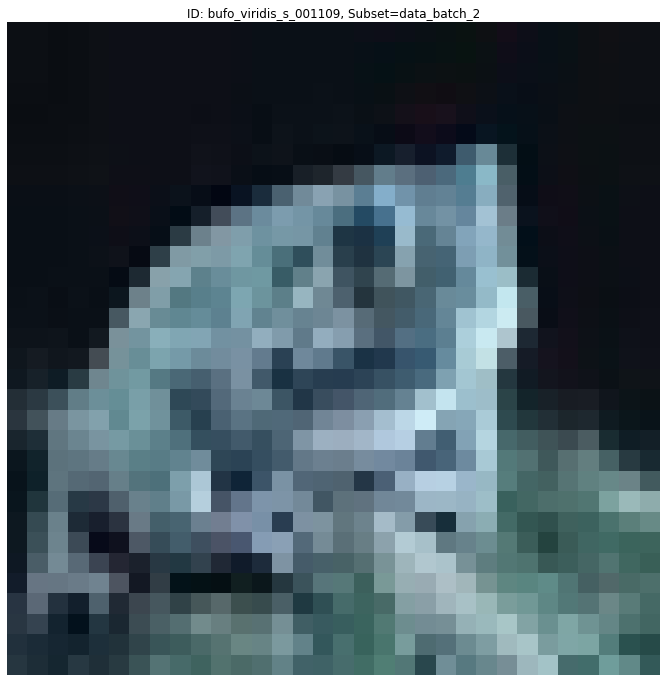

In [17]:
visualizer = Visualizer(cifar_dataset, figsize=(12, 12), alpha=0)
fig = visualizer.vis_one_sample(query.id, "data_batch_2")
fig.show()

In [18]:
searcher = Searcher(cifar_dataset)

In [19]:
topk_list = searcher.search_topk(query, topk=15)

In [20]:
results = [query] + topk_list[1:]

In [21]:
subset_list = []
id_list =[]
for result in results:
    subset_list.append(result.subset)
    id_list.append(result.id)

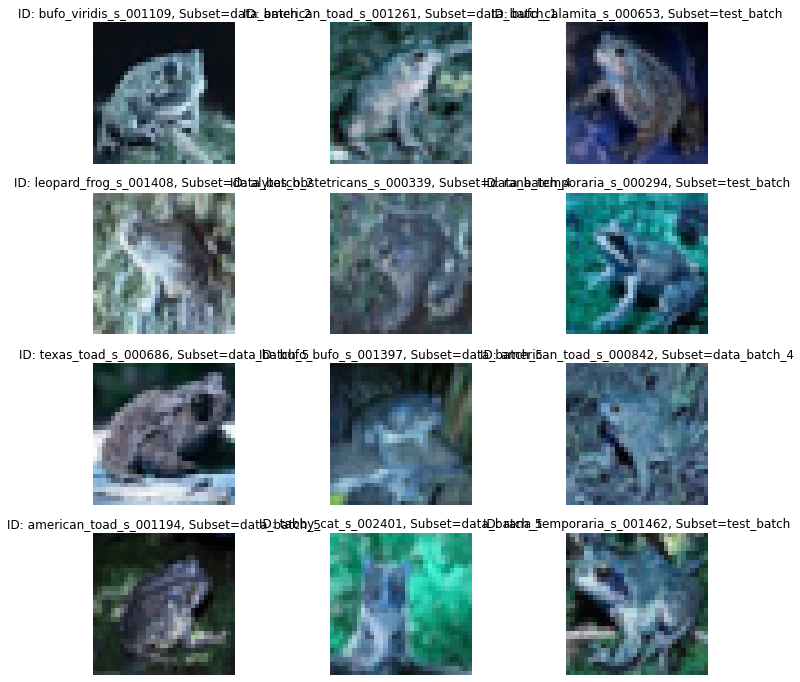

In [22]:
fig = visualizer.vis_gallery(id_list[:12], subset_list[:12])
fig.show()